In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('综合评价.xlsx')
data.head()

,Unnamed: 0,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,...,r,s,t,u,v,w,x,y,z,hard pecent
0,247,2022-04-28,313,zesty,88974,6315,0,2,12,27,...,0,1,1,0,0,0,0,1,1,0.070976
1,150,2022-08-03,410,youth,38381,3327,1,5,17,31,...,0,0,1,1,0,0,0,1,0,0.086684
2,230,2022-05-15,330,yield,67115,4963,0,4,16,29,...,0,0,0,0,0,0,0,1,0,0.073948
3,335,2022-01-30,225,wrung,294687,11524,0,2,18,39,...,1,0,0,1,0,1,0,0,0,0.039106
4,130,2022-08-23,430,woven,33549,2933,0,2,13,32,...,0,0,0,0,1,1,0,0,0,0.087424


In [3]:
data.columns

Index(['Unnamed: 0', 'Date', 'Contest number', 'Word',
       'Number of  reported results', 'Number in hard mode', '1 try',
       '2 tries', '3 tries', '4 tries', '5 tries', '6 tries',
       '7 or more tries (X)', 'len', '分档等级', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
       'v', 'w', 'x', 'y', 'z', 'hard pecent'],
      dtype='object')

In [4]:
X=data[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v',
       'w', 'x', 'y', 'z']]
Y=data['分档等级']

In [5]:
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


tr_x,te_x,tr_y,te_y=train_test_split(X,Y,test_size=0.1,random_state=5)


model=MLPClassifier(hidden_layer_sizes=10,max_iter=1000).fit(tr_x,tr_y)
print("神经网络:")
print("训练集准确度:{:.3f}".format(model.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(model.score(te_x,te_y)))
y_pred = model.predict(te_x)
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
# 准确率，召回率，F-score评价
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))


print("\n逻辑回归:")
logreg = LogisticRegression(C=1,solver='liblinear',multi_class ='auto')
logreg.fit(tr_x, tr_y)
score = logreg.score(tr_x, tr_y)
score2 = logreg.score(te_x, te_y)
print("训练集准确度:{:.3f}".format(logreg.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(logreg.score(te_x,te_y)))
y_pred = logreg.predict(te_x)
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))


print("\n决策树:")
tree=DecisionTreeClassifier(max_depth=50,random_state=0)
tree.fit(tr_x,tr_y)
y_pred = tree.predict(te_x)
print("训练集准确度:{:.3f}".format(tree.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(tree.score(te_x,te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))

print("\n随机森林:")
rf=RandomForestClassifier(max_depth=20,n_estimators=1000,random_state=0)
rf.fit(tr_x,tr_y)
print("训练集准确度:{:.3f}".format(rf.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(rf.score(te_x,te_y)))
y_pred = rf.predict(te_x)
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))


print("\nLGBM:")
lgb_model=lgb.LGBMClassifier()
lgb_model.fit(tr_x,tr_y)
print("训练集准确度:{:.3f}".format(lgb_model.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(lgb_model.score(te_x,te_y)))
y_pred = lgb_model.predict(te_x)
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))


print("\nXGBOOST:")
xgb_model=xgb.XGBClassifier()
xgb_model.fit(tr_x,tr_y)
print("训练集准确度:{:.3f}".format(xgb_model.score(tr_x,tr_y)))
print("测试集准确度:{:.3f}".format(xgb_model.score(te_x,te_y)))
y_pred = xgb_model.predict(te_x)
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("ACC",accuracy_score(te_y,y_pred))
print("REC",recall_score(te_y,y_pred,average="weighted"))
print("F-score",f1_score(te_y,y_pred,average="weighted"))


C:\Users\Linling\AppData\Roaming\spsspro\spsspro\lib\python\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


神经网络:
训练集准确度:0.892
测试集准确度:0.694
平均绝对误差: 0.3055555555555556
ACC 0.6944444444444444
REC 0.6944444444444444
F-score 0.6830601092896175

逻辑回归:
训练集准确度:0.712
测试集准确度:0.806
平均绝对误差: 0.19444444444444445
ACC 0.8055555555555556
REC 0.8055555555555556
F-score 0.7435897435897435

决策树:
训练集准确度:1.000
测试集准确度:0.583
平均绝对误差: 0.4166666666666667
ACC 0.5833333333333334
REC 0.5833333333333334
F-score 0.6221756347542511

随机森林:
训练集准确度:1.000
测试集准确度:0.722
平均绝对误差: 0.2777777777777778
ACC 0.7222222222222222
REC 0.7222222222222222
F-score 0.6989247311827957

LGBM:
训练集准确度:0.901
测试集准确度:0.611
平均绝对误差: 0.3888888888888889
ACC 0.6111111111111112
REC 0.6111111111111112
F-score 0.6408730158730159

XGBOOST:
[09:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
训练集准确度:0.997
测试

In [40]:
from collections import Counter
aa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')
i='eerie'
tt=Counter(i.strip())
bb=[0]*26
for j in tt:
    bb[aa.index(j)]=tt[j]
bb

[0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [42]:
#model:神经网络
#xgb_model：xgboost
xgb_model.predict(np.array(bb).reshape(1, -1))

array([2], dtype=int64)

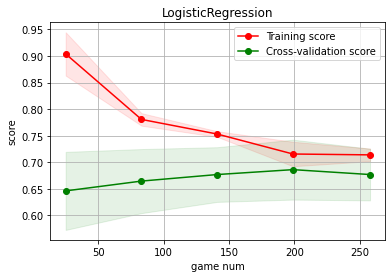

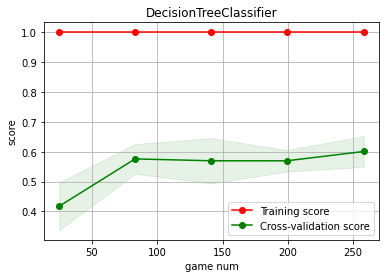

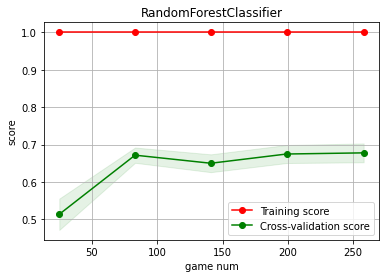

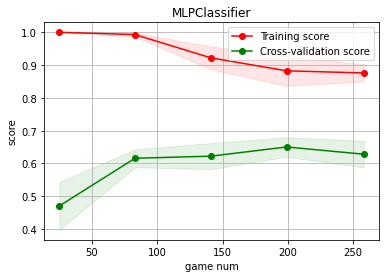

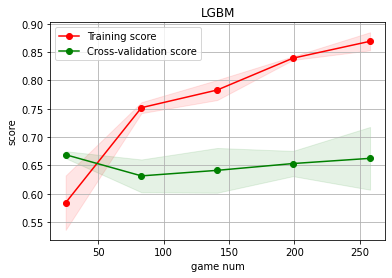

[09:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:12:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

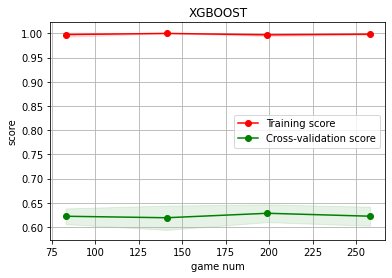

<module 'matplotlib.pyplot' from 'C:\\Users\\Linling\\AppData\\Roaming\\spsspro\\spsspro\\lib\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# 学习曲线函数

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("game num")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.savefig('./Q3/%s.jpg'%title)
    plt.legend(loc="best")
    plt.show()
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(logreg, "LogisticRegression", tr_x, tr_y, ylim=None, cv=cv, n_jobs=1)
plot_learning_curve(tree, "DecisionTreeClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(rf, "RandomForestClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(model, "MLPClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)

plot_learning_curve(lgb_model, "LGBM", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(xgb_model, "XGBOOST", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)


In [7]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import Conv1D
from keras.optimizers import Adam, SGD, RMSprop
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau

In [8]:
Y=Y.map(
{1:0,
2:1,
3:2}
)

In [9]:
y=to_categorical(Y.values)
x = np.expand_dims(X.values, axis=-1)
print(x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(359, 26, 1) (359, 3)
(287, 26, 1) (72, 26, 1) (287, 3) (72, 3)


In [10]:
# 建模
model = Sequential()
model.add(Conv1D(filters=4, kernel_size=3, padding='same', input_shape=(x.shape[1], 1), activation='tanh', strides=2))
model.add(Conv1D(filters=8, kernel_size=6, padding='same', activation='tanh', strides=2))
model.add(Conv1D(filters=16, kernel_size=9, padding='same', activation='tanh', strides=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 4)             16        
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 8)              200       
                                                                 
 conv1d_2 (Conv1D)           (None, 4, 16)             1168      
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1,579
Trainable params: 1,579
Non-trainable params: 0
_________________________________________________________________


In [11]:

# 优化器选择Adam 学习率为0.0001 损失函数使用交叉熵 训练200次
model.compile(optimizer=Adam(0.0001), loss=categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=1, batch_size=64, callbacks=[
    CSVLogger('train.log'),
    ModelCheckpoint('mode5l.h5', save_best_only=True, verbose=1, monitor='val_acc'),
    ReduceLROnPlateau(factor=0.9, patience=5, verbose=2)
])

Epoch 1/100
5/5 [==============================] - 0s 31ms/step - loss: 1.1077 - accuracy: 0.2927 - val_loss: 1.0804 - val_accuracy: 0.3889 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 1.1018 - accuracy: 0.3066 - val_loss: 1.0741 - val_accuracy: 0.3889 - lr: 1.0000e-04
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 1.0962 - accuracy: 0.3206 - val_loss: 1.0676 - val_accuracy: 0.4028 - lr: 1.0000e-04
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0905 - accuracy: 0.3345 - val_loss: 1.0613 - val_accuracy: 0.4306 - lr: 1.0000e-04
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0849 - accuracy: 0.3554 - val_loss: 1.0551 - val_accuracy: 0.4444 - lr: 1.0000e-04
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 1.0797 - accuracy: 0.3798 - val_loss: 1.0489 - val_accuracy: 0.4583 - lr: 1.0000e-04
Epoch 7/100
5/5 [==============================] - 0s 7ms/step 

In [12]:
from sklearn.metrics import classification_report,f1_score
pre_test = model.predict(x_test)

3/3 [==============================] - 0s 1ms/step


In [13]:
pre_test = model.predict(x_test)
print(f1_score(np.argmax(pre_test, axis=1), np.argmax(y_test, axis=1),average='weighted'))

3/3 [==============================] - 0s 1ms/step
0.8571428571428571


In [14]:
pre_train= model.predict(x_train)

9/9 [==============================] - 0s 625us/step


In [15]:
print("训练集F1:{:.3f}".format(f1_score(np.argmax(pre_train, axis=1), np.argmax(y_train, axis=1),average='weighted')))
print("测试集F1:{:.3f}".format(f1_score(np.argmax(pre_test, axis=1), np.argmax(y_test, axis=1),average='weighted')))

训练集F1:0.802
测试集F1:0.857


In [16]:
from collections import Counter
aa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')
i='eerie'
tt=Counter(i.strip())
bb=[0]*26
for j in tt:
    bb[aa.index(j)]=tt[j]
bb

[0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
x = np.expand_dims(np.array([bb,bb]), axis=-1)

In [37]:
model.predict(x)[0]#eerie为012档的概率

1/1 [==============================] - 0s 12ms/step


array([0.07548992, 0.74496204, 0.17954797], dtype=float32)

In [39]:
np.argmax(model.predict(x), axis=1)[0]#eerie为1档

1/1 [==============================] - 0s 11ms/step


1